## Projekt zaliczeniowy - Modelowanie ryzyka kredytowego i operacyjnego
### Wykonali: Barbara Blicharska, Rafał Zając

# **Wstęp**

### *Czym jest LDA?*

#### Linear Discriminant Analysis (LDA) jest to technika redukcji wymiarowości, mająca zastosowanie w uczeniu maszynowym. Dane wielowymiarowe obejmują wiele cech, które są ze sobą skorelowane. Głównym celem redukcji wielowymiarowości jest usunięcie zbędnych i zależnych cech poprzez zmianę zbioru danych na przestrzeń o niższym wymiarze. W porównaniu do regresji liniowej, która ograniczona jest do klasyfikacji dwuklasowej, liniowa analiza dyskryminacyjna może być też używana w przypadku problemów o większej ilości klas. 

### *Modele LDA*

#### Reprezentacja LDA składa się z właściwości statystycznych danych, obliczonych dla każdej klasy. Dla pojedynczej zmiennej wejściowej (x) jest to średnia i wariancja zmiennej dla każdej klasy. W przypadku zmiennych wielokrotnych są to te same właściwości obliczone dla wielowymiarowego Gaussa, a mianowicie średnie i macierz kowariancji. Właściwości statystyczne są szacowane na podstawie danych i podłączane do równania LDA w celu prognozowania. 

### *Jak działa LDA?* 
 
#### Działanie LDA można opisać w trzech krokach:

#### - należy obliczyć separowalność między klasami, która jest odległością między średnimi różnych klas. Nazywa się to wariancją międzyklasową.

#### - należy obliczyć odległość między średnią a próbką każdej klasy. Jest to nazywane wariancją wewnątrzklasową.

#### - należy skonstruować przestrzeń o mniejszym wymiarze, która maksymalizuje wariancję międzyklasową i minimalizuje wariancję wewnątrzklasową. 

### *W jaki sposób model LDA tworzy prognozy?*

#### Modele LDA wykorzystują twierdzenie Bayesa do szacowania prawdopodobieństw. Tworzą one prognozy w oparciu o prawdopodobieństwo, że nowy zestaw danych wejściowych należy do każdej klasy. Klasa o najwyższym prawdopodobieństwie jest uważana za klasę wyjściową, a następnie LDA dokonuje prognozy. Przewidywanie odbywa się za pomocą twierdzenia Bayesa, które szacuje prawdopodobieństwo klasy wyjściowej na podstawie danych wejściowych. Wykorzystują one również prawdopodobieństwo każdej klasy i prawdopodobieństwo przynależności danych do każdej klasy.








### *Wczytanie niezbędnych bibliotek oraz danych.*

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from models import AltmanModel, GroverModel, ZmijewskiModel


df = pd.read_csv("data1year.csv", sep=';', decimal=',')

### *Wstępna analiza danych*

In [33]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5888 entries, 0 to 5887
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   5888 non-null   float64
 1   Attr2   5888 non-null   float64
 2   Attr3   5888 non-null   float64
 3   Attr4   5888 non-null   float64
 4   Attr5   5877 non-null   float64
 5   Attr6   5888 non-null   float64
 6   Attr7   5888 non-null   float64
 7   Attr8   5888 non-null   float64
 8   Attr9   5888 non-null   float64
 9   Attr10  5888 non-null   float64
 10  Attr11  5888 non-null   float64
 11  Attr12  5888 non-null   float64
 12  Attr13  5888 non-null   float64
 13  Attr14  5888 non-null   float64
 14  Attr15  5888 non-null   float64
 15  Attr16  5888 non-null   float64
 16  Attr17  5888 non-null   float64
 17  Attr18  5888 non-null   float64
 18  Attr19  5888 non-null   float64
 19  Attr20  5888 non-null   float64
 20  Attr21  5787 non-null   float64
 21  Attr22  5888 non-null   float64
 22  

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
128,0.099173,0.37613,0.616210,2.65480,210.9200,0.000000,0.124500,1.65860,1.00320,0.62387,...,0.142360,0.158960,0.87633,0.0000,9.709,3.1381,135.490,2.6940,87.8810,0
4426,0.013685,0.38706,0.136730,1.35330,-1.4646,0.020173,0.024210,1.33230,1.01930,0.51568,...,0.018922,0.026538,0.98108,0.0000,19.365,7.1086,52.966,6.8913,5.6013,0
2580,0.083122,0.46927,0.530730,2.13100,107.4500,0.000000,0.083122,1.13100,2.43720,0.53073,...,0.329090,0.156620,0.67550,0.0000,57.134,8.6904,70.279,5.1936,NaN,0
2417,0.033504,0.87539,-0.152190,0.71574,-204.3600,-0.134490,0.033504,0.14234,0.71137,0.12461,...,0.270980,0.268880,0.76857,2.2778,24.153,2.9748,274.710,1.3287,1.1533,0
527,0.003005,0.51673,0.071971,1.13930,3.1690,0.193970,0.003005,0.93524,3.13370,0.48327,...,0.014808,0.006219,0.99904,0.0000,73.130,6.0159,60.186,6.0645,7.6192,0


In [34]:
df.describe() 

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,5888.000000,5888.000000,5888.000000,5888.000000,5.877000e+03,5888.000000,5888.000000,5888.000000,5888.000000,5888.000000,...,5888.000000,5888.000000,5888.000000,5888.000000,5.626000e+03,5878.000000,5888.000000,5888.000000,5789.000000,5888.000000
mean,0.055005,0.466460,0.179776,4.893307,1.956267e+02,0.103000,-0.034953,5.734974,1.585119,0.494478,...,0.057183,-0.265769,0.957007,0.280199,9.136123e+02,10.850060,238.623313,9.129289,60.400315,0.068954
std,1.245471,5.760500,1.097227,91.442317,1.636997e+04,7.974659,6.763742,102.389405,1.533658,4.603729,...,0.698425,18.454617,0.858650,5.849951,6.424585e+04,40.613075,6224.321071,103.082989,2119.385809,0.253397
min,-32.052000,-430.870000,-72.067000,-0.403110,-6.947300e+04,-100.380000,-517.480000,-3.735100,0.000191,-71.444000,...,-46.788000,-1236.300000,-0.164390,-184.980000,3.676300e-02,0.009009,-236.530000,-1.543200,0.000000,0.000000
25%,0.003988,0.257305,0.043413,1.093850,-4.400200e+01,0.000000,0.005901,0.481865,1.015000,0.318522,...,0.011057,0.016074,0.876772,0.000000,5.251350e+00,4.280125,44.922750,3.067350,2.154600,0.000000
50%,0.046720,0.452690,0.218955,1.651900,3.905500e-01,0.000000,0.056533,1.149300,1.139800,0.522195,...,0.053206,0.110190,0.950470,0.006098,9.054450e+00,6.198750,74.006000,4.930350,4.108300,0.000000
75%,0.116837,0.662120,0.417110,2.931275,4.840900e+01,0.109065,0.136755,2.768600,1.825600,0.719425,...,0.124798,0.242850,0.990422,0.206567,1.733875e+01,9.347000,118.890000,8.117000,9.204800,0.000000
max,87.459000,72.416000,0.998280,6845.800000,1.250100e+06,543.250000,2.352300,6868.500000,65.607000,339.850000,...,1.000000,87.981000,47.788000,308.150000,4.818700e+06,1308.500000,451380.000000,7641.300000,158180.000000,1.000000


Zbiór danych pochodzi ze strony: http://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data. Dotyczy on prognozowania upadłości polskich firm. Upadłe przedsiębiorstwa były analizowane w latach 2000-2012, podczas gdy nadal działające firmy były oceniane od 2007 do 2013 roku. 

Zestaw składa się z 65 zmiennych. Pierwsze 64 zmienne są numeryczne (dokładnie typu float), a każda z nich odnosi do innego wskaźnika finansowego. Ostatnia zmienna jest binarna - przyjmuje wartości 0/1 i wskazuje na upadłość danego przedsiębiorstwa przy czym 1 - oznacza banructwo firmy, a 0 -brak bankructwa.

W zbiorze zgromadzono 5888 obserwacji.

### *Sprawdzenie istnienia wartości NaN w zbiorze*

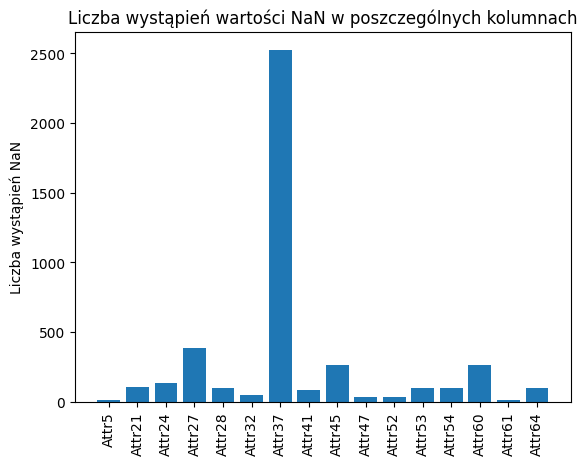

In [35]:
columns_with_na = df.isna().any(axis=0)
columns_with_na = columns_with_na[columns_with_na].index
na_count = df.isna().sum()
na_count_filtered = na_count[na_count > 0]

plt.bar(columns_with_na,na_count_filtered)
plt.xticks(columns_with_na, rotation='vertical')
plt.ylabel('Liczba wystąpień NaN')
plt.title('Liczba wystąpień wartości NaN w poszczególnych kolumnach')
plt.show()

Obecność brakujących wartości jest kłopotliwa
dla modelu i może utrudniać jego działanie. Na rysunku widać, że tylko jedna kolumna ma ponad 40% brakujących wartości, podczas gdy pozostałe kolumny mają niewiele brakujących wartości. 

### *Obsłużenie występujących wartości NaN w zbiorze* 

In [36]:
df=df.drop('Attr37', axis=1)

def fill_nan_with_mean(df):
    for column in df.columns:
        column_mean = df[column].mean()
        df[column].fillna(column_mean, inplace=True)

fill_nan_with_mean(df)

W przypadku kolumn z niewielkim odsetkiem zdecydowano, że brakujące wartości zostaną zastąpione przez średnią dla kolumny. Kolumna, w której brakowało prawie połowy wartości (*Attr37*), musiała zostać całkowicie usunięta ze zbioru danych.

### *Analiza korelacji zmiennych*

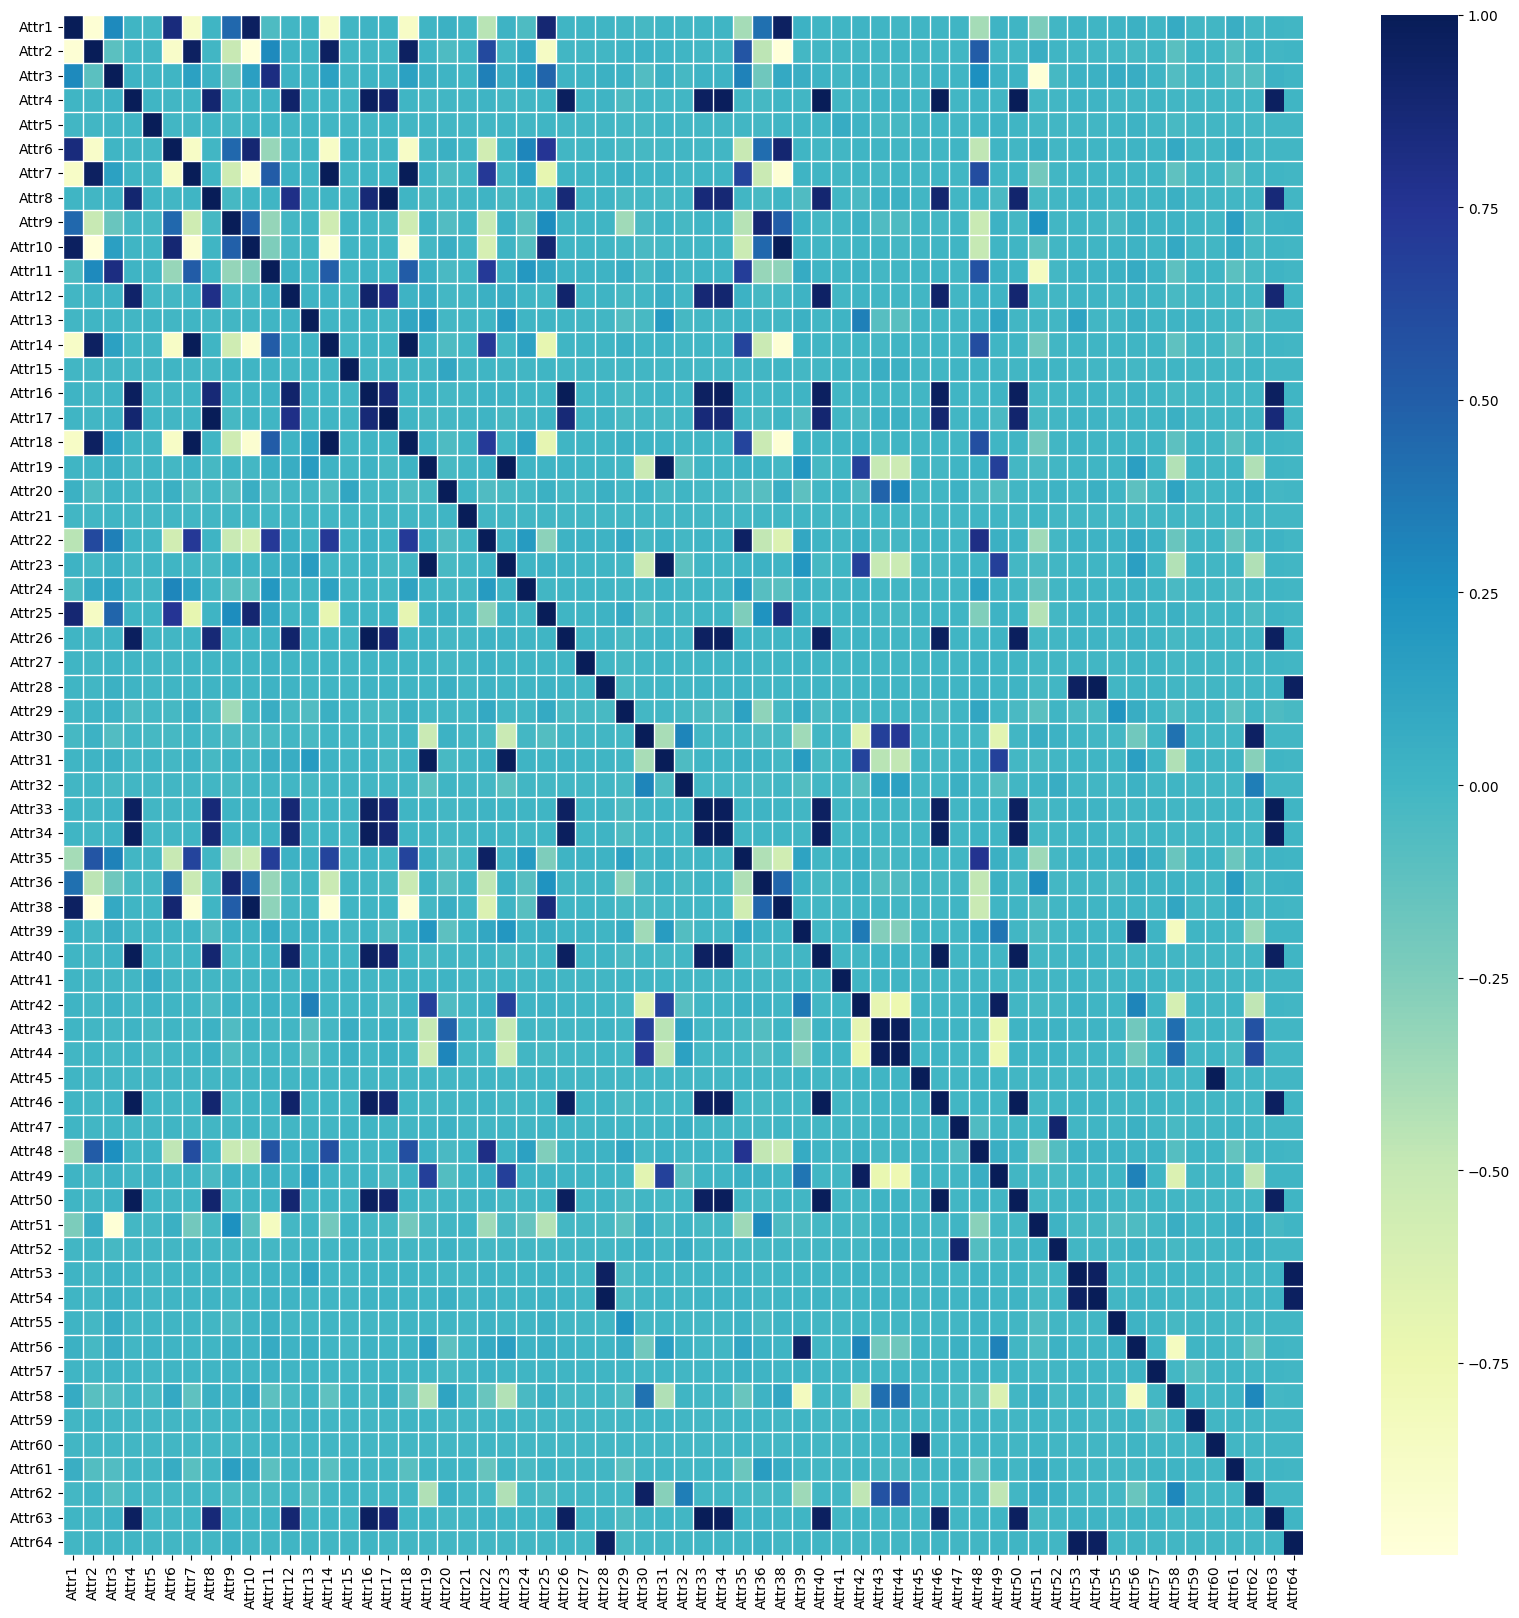

<Figure size 640x480 with 0 Axes>

In [37]:
dfCorr = df.copy()
del dfCorr['class']
plt.figure(figsize= (20,20))
sns.heatmap(dfCorr.corr(), annot=False, cmap='YlGnBu')

for i in range(len(dfCorr.columns) - 1):
    plt.axvline(i, color='white', linewidth=1)

for i in range(len(dfCorr.index) - 1):
    plt.axhline(i, color='white', linewidth=1)

plt.show()
plt.clf()

Zmienne, które są ze sobą silnie skorelowane (wartość p większa niż 0,90) można określić jako
nadmiarowe dane, które w rzeczywistości w równym stopniu przyczyniają się do przewidywania zmiennej docelowej. Analizując macierz korelacji, można zaobserwować, iż w przypadku większości zmiennych korelacja nie przekracza dopuszczalnej wartości, jednak dla kilku zmiennych jest ona zbyt wysoka, a fakt ten musi być uzwględniony przy budowie modelu.


### **Budowa modelu LDA**

### *Wybór zmiennych*

Jak wskazuje w swoim badaniu "Problemy prognozowania bankructwa firmy metodą analizy dyskryminacyjnej" Józef Pociecha, selekcja predyktorów (zmiennych objaśniających) do modelu przewidującego upadłość firm jest wyzwaniem. Pomimo wielu badań nad procesem modelowania upadłości, nie udało się ustalić ogólnych zasad dotyczących wyboru zmiennych ani zgromadzić wystarczających dowodów, które byłyby przekonujące w zakresie wprowadzania wyłącznie danych finansowych, wyłącznie danych niefinansowych lub obu typów danych jednocześnie, a także w jakich proporcjach. E.I. Altman (2000) stwierdza, że niezależnie od zastosowanej metody, modele te nie są odporne na czynnik czasu ani nie mogą być stosowane w innych warunkach gospodarczo-prawnych niż te, na podstawie których zostały zbudowane.

Zmienne do samodzielnie zbudowaneego modelu wybrano na podstawie badań przeprowadzonych przez Józefa Pociechę "Problemy prognozowania bankructwa firmy metodą analizy dyskryminacyjnej" oraz Shantanu Deshpande "Corporate Bankruptcy Prediction usingMachine Learning Techniques". Bazując na przeanalizowanych przypadkach, opracowanych wynikach oraz przeprowadzonych wnioskowaniach zdecydowano o zbudowaniu modelu opartego o następujące zmienne: 

**ZMIENNE OBJAŚNIAJĄCE**

- *X1* - (Zysk/strata netto) / Aktywa ogółem - **Attr1**
- *X2* - ((Zysk/strata netto) +  Amortyzacja) / Pasywa ogółem - **Attr26**
- *X3* - Zysk z działalności operacyjnej / Koszty finansowe - **Attr27**
- *X4* - Zysk ze sprzedaży / Sprzedaż ogółem - **Attr39**
- *X5* - Zysk działalności operacyjnej / Przychody ze sprzedaży - **Attr42**
- *X6* - Koszty ogółem / Sprzedaż ogółem - **Attr58**


**ZMIENNA OBJAŚNIANA**
- *y* - zmienna binarna gdzie 1 - bankructwo firmy, 0 - brak bankructwa firmy

In [38]:
cols_n = [1, 26, 27, 39, 42, 58]
cols = [f"Attr{col}" for col in cols_n]
X = df[cols]
y = df['class']

### *Rozkład zmiennej objaśnianej*

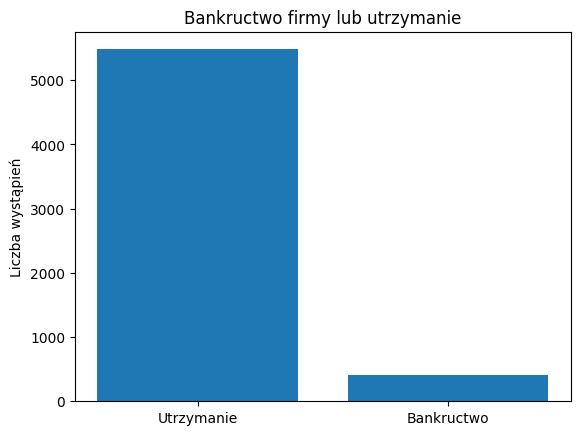

class
0    5482
1     406
Name: count, dtype: int64

In [39]:

count_0 = y.value_counts()[0]
count_1 = y.value_counts()[1]


labels = ['Utrzymanie', 'Bankructwo']
values = [count_0, count_1]

plt.bar(labels, values)
plt.ylabel('Liczba wystąpień')
plt.title('Bankructwo firmy lub utrzymanie')
plt.show()

y.value_counts()


W analizowanym zbiorze, 5482 przedsiębiorstw jest zakwalifikowanych jako firmy, które nie uległy bankructwu i tylko 406 przedsiębiorstw upadłych. Na podstawie tych informacji zauważalne jest znaczne zaburzenie i brak zbalansowania danych.

### *Analiza korelacji wybranych zmiennych*

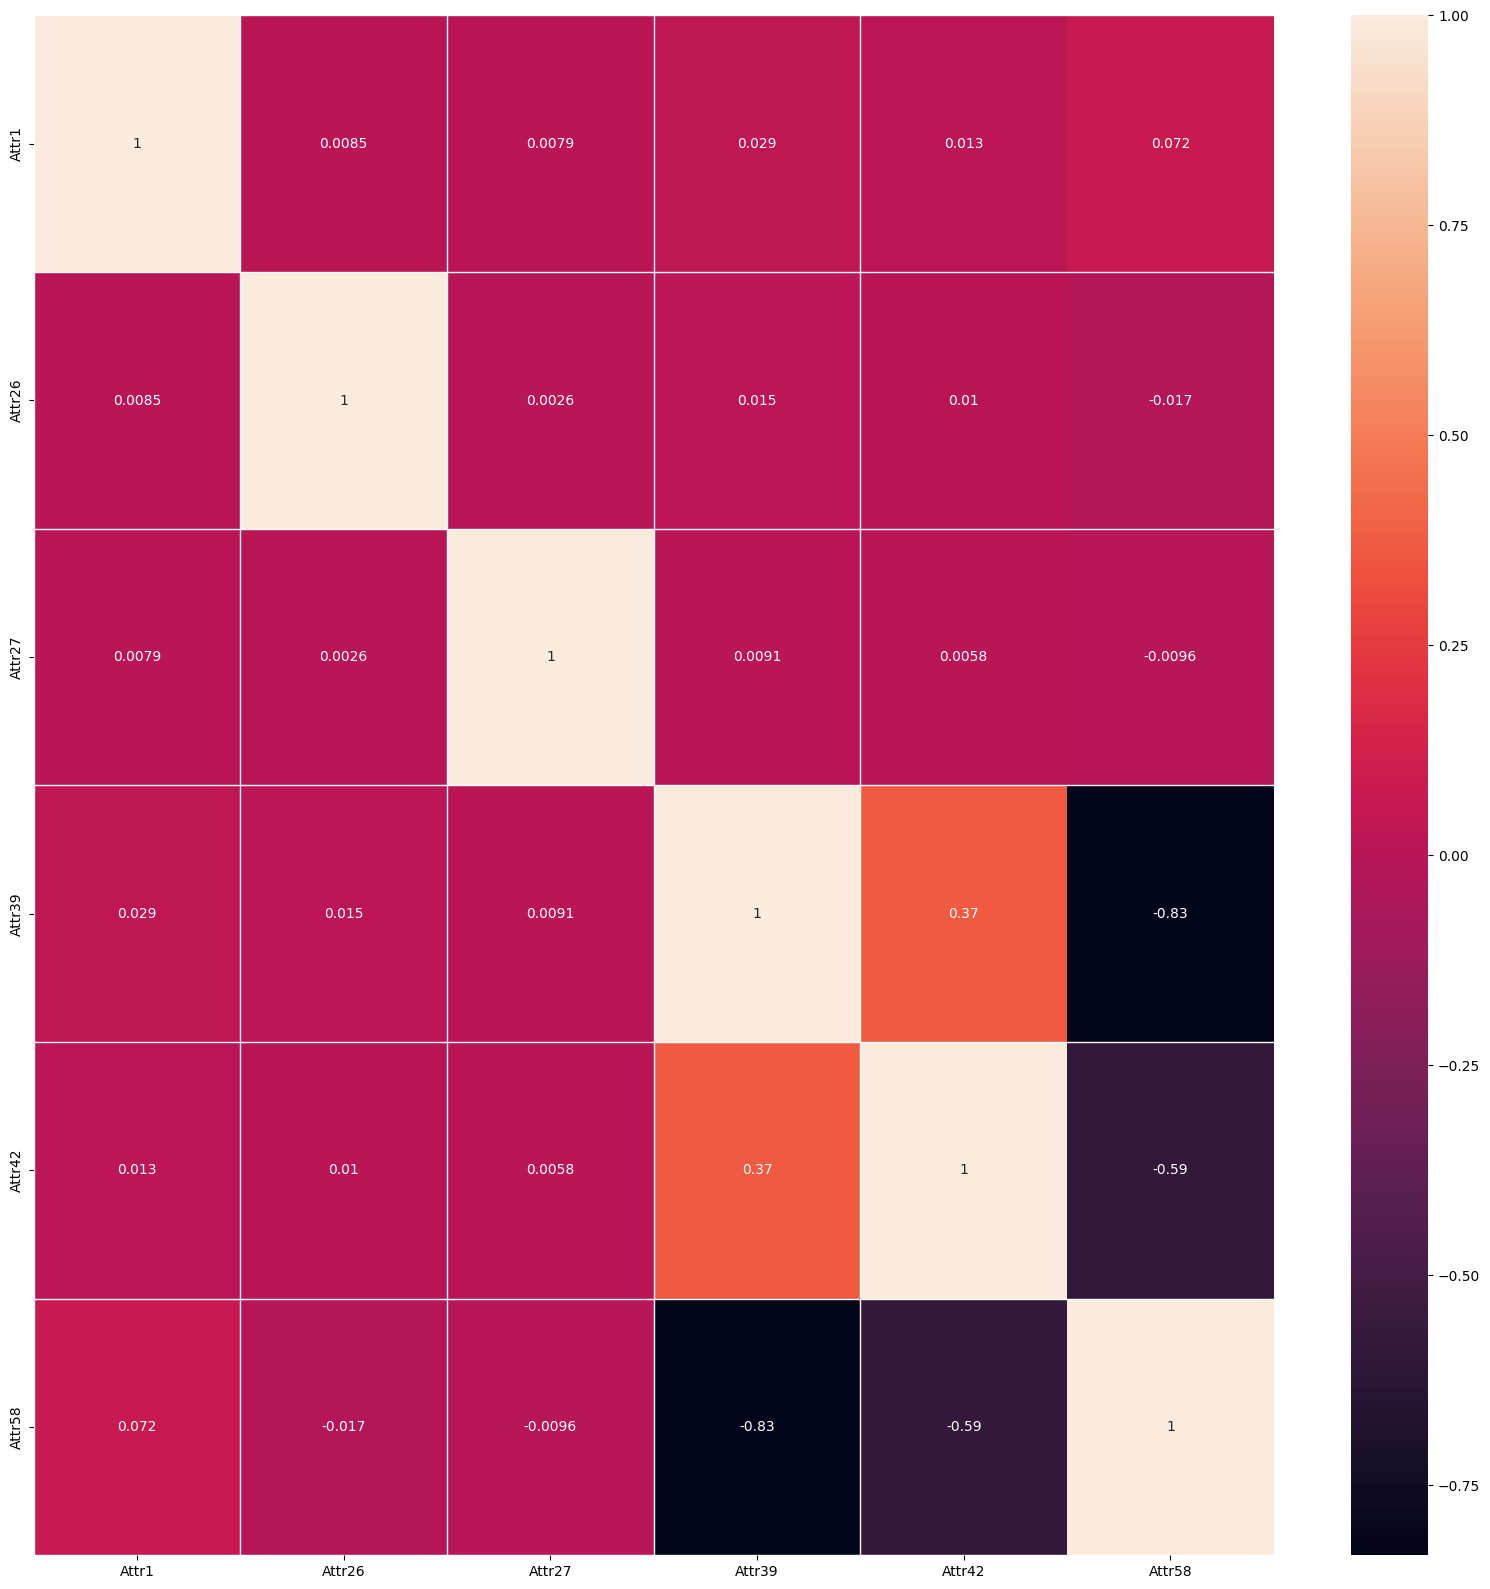

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize= (20,20))
sns.heatmap(X.corr(), annot=True)

for i in range(len(X.columns) - 1):
    plt.axvline(i, color='white', linewidth=1)

for i in range(len(df.index) - 1):
    plt.axhline(i, color='white', linewidth=1)

plt.show()
plt.clf()

Na podstawie analizy korelacji zmiennych objaśniających, możemy zauważyć że żadna wartość korelacji nie przekracza granicznej wartości 0.9 lub -0.9. Na tej podstawie, pod względem korelacji, można przyjąć założone wcześniej zmienne do budowania modelu.

### *Utworzenie zbioru zbalansowanego*

In [43]:
modelLDA = LinearDiscriminantAnalysis()

sortedDf = df.groupby('class')
minSize = sortedDf.size().min()
balancedDf = sortedDf.apply(lambda x: x.sample(minSize, random_state=21)).reset_index(drop=True)
balancedDf['class'].value_counts()

class
0    406
1    406
Name: count, dtype: int64

Przy tworzeniu modeli analizy dyskryminacyjnej, czyli takich, które mają na celu rozróżnianie między różnymi klasami lub grupami, istotne jest uwzględnienie balansu zbioru danych. Zbiór danych jest zbalansowany, gdy liczba przykładów dla każdej klasy jest zbliżona lub równa. 

Zbalansowany zbiór danych zapobiega stronniczości modelu w kierunku dominującej klasy. Model, trenowany na zbalansowanym zbiorze danych, nie będzie skłonny do faworyzowania jednej klasy kosztem innych.
Zbalansowany zbiór danych umożliwia modelowi uzyskanie lepszej ogólnej wydajności, ponieważ ma równą reprezentację wszystkich klas. To z kolei może prowadzić do lepszej dokładności predykcji na rzeczywistych danych.

Bazując na tych informacjach, stworzono zbiór zbalansowany, w którym znajduje się 406 przedsiębiorstw oznaczonych jest jako upadłe oraz 406, które nie zbankrutowały.

### *Podział zbioru na treningowy oraz testowy*

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    balancedDf[cols],
    balancedDf['class'],
    test_size=0.2,
    random_state=21
)

Dokonano podziału zbioru danych na zbiory treningowe (80% wielkości zbioru) oraz testowe(20% wielkości zbioru). Korzystając z danych treningowych, model jest trenowany i dostosowywany do dostępnych informacji. Jednak aby sprawdzić, jak dobrze model generalizuje na nowych, nieznanych danym, używa się zbioru testowego. Używając zbioru testowego, można ocenić skuteczność modelu na nieznanych wcześniej przykładach i uzyskać rzeczywisty pomiar wydajności.

### *Trenowanie modelu*

In [45]:
modelLDA.fit(X_train, y_train)
print(f"Parametry modelu LDA dla wybranych przez nas danych: {np.round(modelLDA.coef_,2).squeeze()}")

Parametry modelu LDA dla wybranych przez nas danych: [-0.17 -0.17 -0.   -0.91  0.13 -0.24]


Uczenie/trenowanie modelu polega na dostosowaniu parametrów modelu do danych treningowych w celu minimalizacji błędu predykcji. W wyniku tego procesu otrzymano następujący model:

$$Y = -0.17\ast X _{1}-0.17\ast X _{2}-0\ast X _{3}-0.91\ast X _{4}+0.13\ast X _{5}-0.24\ast X _{6}$$

### *Pronozowanie*

In [46]:
y_pred = modelLDA.predict(X_test)
pd.Series(y_pred).value_counts()

0    115
1     48
Name: count, dtype: int64

Wykorzystano nauczony model do predykcji wartości dla danych testowych.

### *Utworzenie metryk i mcierzy błędu w celu oceny modelu*

              precision    recall  f1-score   support

  Utrzymanie       0.63      0.96      0.76        75
  Bankructwo       0.94      0.51      0.66        88

    accuracy                           0.72       163
   macro avg       0.78      0.74      0.71       163
weighted avg       0.79      0.72      0.71       163



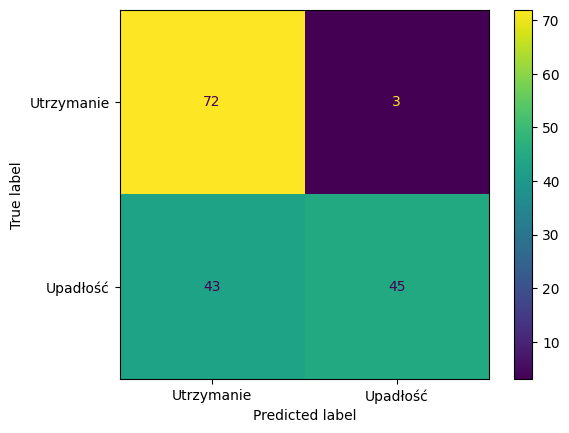

In [47]:
print(classification_report(y_test, y_pred, target_names=["Utrzymanie", "Bankructwo"]))
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrixDisplay = ConfusionMatrixDisplay(confusionMatrix, display_labels=["Utrzymanie", "Upadłość"])
confusionMatrixDisplay.plot()

Precyzja dla klasy "Utrzymanie" wynosi 0.63, co oznacza, że 63% próbek sklasyfikowanych jako "Utrzymanie" były poprawne. Dla klasy "Bankructwo" precyzja wynosi 0.94, co oznacza, że 94% próbek sklasyfikowanych jako "Bankructwo" były poprawne. Wyższa precyzja wskazuje na lepszą zdolność modelu do identyfikowania konkretnych klas.

Czułość dla klasy "Utrzymanie" wynosi 0.96, co oznacza, że model prawidłowo zidentyfikował 96% próbek należących do klasy "Utrzymanie". Dla klasy "Bankructwo" czułość wynosi 0.51, co oznacza, że model zidentyfikował jedynie 51% próbek należących do klasy "Bankructwo". Wyższa czułość wskazuje na lepszą zdolność modelu do wykrywania prawdziwych przypadków danej klasy.

F1-score to miara harmoniczna równoważąca precyzję i czułość. Dla klasy "Utrzymanie" wynosi 0.76, a dla klasy "Bankructwo" wynosi 0.66. Wyższe wartości f1-score wskazują na lepsze ogólne wyniki klasyfikacji.

Dodatkowo, ogólna dokładność modelu (accuracy) wynosi **0.72**, co oznacza, że model poprawnie sklasyfikował 72% wszystkich próbek.

### *Próba poprawy modelu*

Z uwagi na to, iż zmienna **X3** (Attr27) miała bardzo znikomy wpływ na model, a jej współczynnik był bardzo bliski 0, zdecydowano o jej usunięciu. Ponadto, bazując na wcześniej utworzonej macierzy korelacji, podjęto próbę usunięcia z modelu zmiennej o wysokiej korelacji z innymi (zmienna **X4** - Attr39). 

In [48]:
cols_n = [1, 26, 42, 58]
cols = [f"Attr{col}" for col in cols_n]
X = df[cols]
y = df['class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    balancedDf[cols],
    balancedDf['class'],
    test_size=0.2,
    random_state=21
)
modelLDA.fit(X_train, y_train)
print(f"Parametry modelu LDA dla wybranych przez nas danych: {np.round(modelLDA.coef_, 2).squeeze()}")

Parametry modelu LDA dla wybranych przez nas danych: [-0.17 -0.19 -0.03  0.09]


Uzyskano następujące parametry modelu: 

$$Y = -0.16\ast X _{1}-0.17\ast X _{2}-0.6\ast X _{5}+0.11\ast X _{6}$$

In [50]:
y_pred = modelLDA.predict(X_test)
pd.Series(y_pred).value_counts()

0    109
1     54
Name: count, dtype: int64

              precision    recall  f1-score   support

  Utrzymanie       0.64      0.93      0.76        75
  Bankructwo       0.91      0.56      0.69        88

    accuracy                           0.73       163
   macro avg       0.77      0.75      0.73       163
weighted avg       0.79      0.73      0.72       163



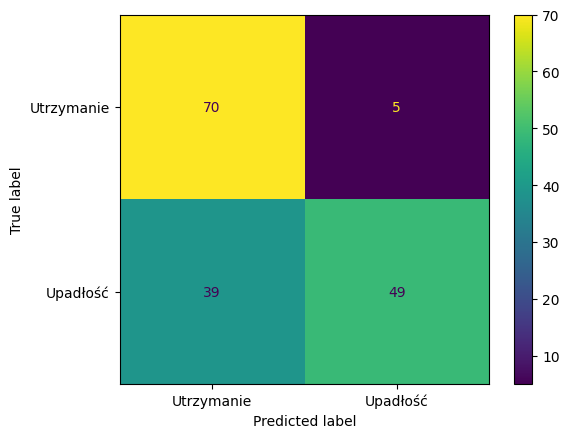

In [51]:
print(classification_report(y_test, y_pred, target_names=["Utrzymanie", "Bankructwo"]))
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrixDisplay = ConfusionMatrixDisplay(confusionMatrix, display_labels=["Utrzymanie", "Upadłość"])
confusionMatrixDisplay.plot()

Zauważalna jest poprawa większości parametrów modelu. 
Ogólna dokładność modelu (accuracy) wynosi **0.73**, co oznacza, że model poprawnie sklasyfikował 73% wszystkich próbek i wartość ta wzrosła o 0.01 w porównaniu do pierwotnej wersji modelu.

Precyzja dla klasy "Utrzymanie" wynosi 0.64, co oznacza, że 64% próbek sklasyfikowanych jako "Utrzymanie" były poprawne. Dla klasy "Bankructwo" precyzja wynosi 0.91, co oznacza, że 91% próbek sklasyfikowanych jako "Bankructwo" były poprawne. Wyższa precyzja wskazuje na lepszą zdolność modelu do identyfikowania konkretnych klas.

Czułość dla klasy "Utrzymanie" wynosi 0.93, co oznacza, że model prawidłowo zidentyfikował 93% próbek należących do klasy "Utrzymanie". Dla klasy "Bankructwo" czułość wynosi 0.56, co oznacza, że model zidentyfikował jedynie 56% próbek należących do klasy "Bankructwo". Wyższa czułość wskazuje na lepszą zdolność modelu do wykrywania prawdziwych przypadków danej klasy.


### *Inne modele*


Inne modele, które zostaną zaprezentowane w tej części projektu nie wymagając trenowania/uczenia, ponieważ wartości ich parametrów zostały już zdefiniowane i wyznaczone. W związku z tym można dokonać testowania na wyjściowym zbiorze niezbalansowanym.

**MODEL ALTMANA**

Model Altmana, znany również jako Z-Score Altmana, jest narzędziem stosowanym do przewidywania bankructwa firm. Został opracowany przez Edwarda I. Altmana w 1968 roku i jest szeroko stosowany w dziedzinie analizy finansowej.

Wzór modelu: 

$$Y = 1.2\ast X _{1}+1.4\ast X _{2}+3.3\ast X _{3}+0.6\ast X _{4}+0.99\ast X _{5}$$

gdzie: 

**ZMIENNE OBJAŚNIAJĄCE**

- **X1** -  aktywa obrotowe / aktywa ogółem,  
- **X2** -  zysk zatrzymany / aktywa ogółem,  
- **X3** -  zysk przed spłatą odsetek i podatkiem / aktywa ogółem,  
- **X4** -  wartość rynkowa kapitału akcyjnego / wartość księgowa zadłużenia,  
- **X5** -  przychody ze sprzedaży / aktywa ogółem  

**ZMIENNA OBJAŚNIANA**

- **y** - zmienna binarna, gdzie 1 - oznacza bankrutwo firmy, 0 - brak bankructwa

### *Prognozowanie/ewaluacja modelu*

In [52]:
cols_n = [3, 6, 7, 8, 9]
cols = [f"Attr{col}" for col in cols_n]
X = df[cols]
y = df['class']
altmanModel = AltmanModel().fit()
y_pred = altmanModel.predict(X)
pd.Series(y_pred).value_counts()

0    5778
1     110
Name: count, dtype: int64

              precision    recall  f1-score   support

  Utrzymanie       0.94      0.99      0.96      5482
  Bankructwo       0.39      0.11      0.17       406

    accuracy                           0.93      5888
   macro avg       0.66      0.55      0.56      5888
weighted avg       0.90      0.93      0.91      5888



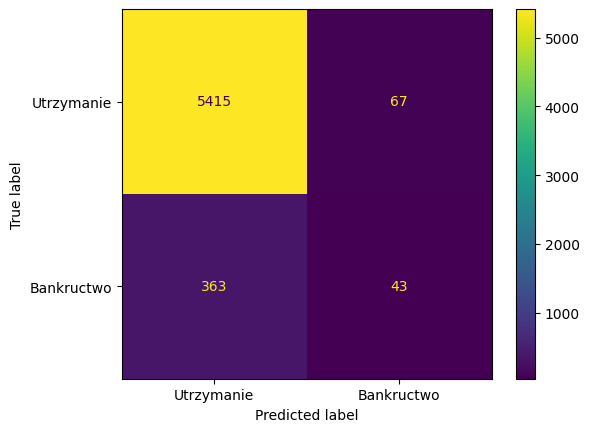

In [53]:
print(classification_report(y, y_pred, target_names=["Utrzymanie", "Bankructwo"]))
cm = confusion_matrix(y, y_pred)
dm = ConfusionMatrixDisplay(cm, display_labels=["Utrzymanie", "Bankructwo"])
dm.plot()

Precyzja dla klasy "Utrzymanie" wynosi 0.94, co oznacza, że 94% próbek sklasyfikowanych jako "Utrzymanie" były poprawne. Dla klasy "Bankructwo" precyzja wynosi 0.39, co oznacza, że 39% próbek sklasyfikowanych jako "Bankructwo" były poprawne. Wyższa precyzja wskazuje na lepszą zdolność modelu do identyfikowania konkretnych klas.

Czułość dla klasy "Utrzymanie" wynosi 0.99, co oznacza, że model prawidłowo zidentyfikował 99% próbek należących do klasy "Utrzymanie". Dla klasy "Bankructwo" czułość wynosi 0.11, co oznacza, że model zidentyfikował jedynie 11% próbek należących do klasy "Bankructwo". Wyższa czułość wskazuje na lepszą zdolność modelu do wykrywania prawdziwych przypadków danej klasy.

F1-score to miara harmoniczna równoważąca precyzję i czułość. Dla klasy "Utrzymanie" wynosi 0.96, a dla klasy "Bankructwo" wynosi 0.17. Wyższe wartości f1-score wskazują na lepsze ogólne wyniki klasyfikacji.

Dodatkowo, ogólna dokładność modelu (accuracy) wynosi **0.93**, co oznacza, że model poprawnie sklasyfikował 93% wszystkich próbek.

Model Altmana bardzo dobrze radzi sobie z prawidłowym klasyfikowaniem firm, których nie dotyka bankructwo, jednak dużo gorzej wygląda u niego identyfikacja przedsiębiorstw bankrutujących. Model nie nadaje się do prognozowania bankructwa przedsiębiorstw.

**MODEL GROVER'A**

Jeffrey S. Grover w 2001 r. przeprojektował model Altmana, dodając 13 nowych wskaźników finansowych.
Model został wykorzystany w badaniach przeprowadzonych na próbie 70 firm:   35 upadłych firm i 35 zdrowych firm w latach 1982-1996.

Wzór modelu: 

$$Y = 0.057+1.65\ast X _{1}+3,404\ast X _{2}-0.016\ast X _{3}$$

gdzie: 

**ZMIENNE OBJAŚNIAJĄCE**

- **X1** -  zysk netto / aktywa ogółem,  
- **X2** -  kapitał obrotowy / aktywa ogółem,  
- **X3** -  EBIT / aktywa ogółem

**ZMIENNA OBJAŚNIANA**

- **y** - zmienna binarna, gdzie 1 - oznacza bankrutwo firmy, 0 - brak bankructwa


### *Prognozowanie/ewaluacja modelu*

In [54]:
cols_n = [1, 3, 7]
cols = [f"Attr{col}" for col in cols_n]
X = df[cols]
y = df['class']

In [55]:
groverModel = GroverModel().fit()
y_pred = groverModel.predict(X)
pd.Series(y_pred).value_counts()

0    4902
1     986
Name: count, dtype: int64

              precision    recall  f1-score   support

  Utrzymanie       0.96      0.86      0.91      5482
  Bankructwo       0.22      0.53      0.31       406

    accuracy                           0.84      5888
   macro avg       0.59      0.69      0.61      5888
weighted avg       0.91      0.84      0.87      5888



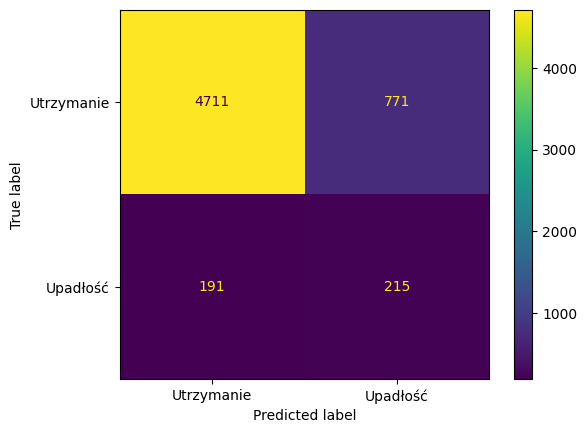

In [56]:
print(classification_report(y, y_pred, target_names=["Utrzymanie", "Bankructwo"]))
confusionMatrix = confusion_matrix(y, y_pred)
confusionMatrixDisplay = ConfusionMatrixDisplay(confusionMatrix, display_labels=["Utrzymanie", "Upadłość"])
confusionMatrixDisplay.plot()

Precyzja dla klasy "Utrzymanie" wynosi 0.96, co oznacza, że 96% próbek sklasyfikowanych jako "Utrzymanie" były poprawne. Dla klasy "Bankructwo" precyzja wynosi 0.22, co oznacza, że 22% próbek sklasyfikowanych jako "Bankructwo" były poprawne. Wyższa precyzja wskazuje na lepszą zdolność modelu do identyfikowania konkretnych klas.

Czułość dla klasy "Utrzymanie" wynosi 0.86, co oznacza, że model prawidłowo zidentyfikował 86% próbek należących do klasy "Utrzymanie". Dla klasy "Bankructwo" czułość wynosi 0.53, co oznacza, że model zidentyfikował jedynie 53% próbek należących do klasy "Bankructwo". Wyższa czułość wskazuje na lepszą zdolność modelu do wykrywania prawdziwych przypadków danej klasy.

F1-score to miara harmoniczna równoważąca precyzję i czułość. Dla klasy "Utrzymanie" wynosi 0.91, a dla klasy "Bankructwo" wynosi 0.31. Wyższe wartości f1-score wskazują na lepsze ogólne wyniki klasyfikacji.

Dodatkowo, ogólna dokładność modelu (accuracy) wynosi **0.84**, co oznacza, że model poprawnie sklasyfikował 84% wszystkich próbek i jest to dość satysfakcjonujący wynik.

Model Grover'a, podobnie jak Altmana, dobrze radzi sobie z prawidłowym klasyfikowaniem firm, których nie dotyka bankructwo, dużo gorzej wygląda u niego identyfikacja przedsiębiorstw bankrutujących.

**MODEL ZMIJEWSKIEGO**

Model Zmijewskiego to model bankructwa używany do przewidywania bankructwa firmy w ciągu dwóch lat. Współczynniki wykorzystywane w tym modelu zostały określone przez analizę probitową. Jednym z zarzutów stawianych przez Zmijewskiego było to, że inne modele oceny bankructwa nadmiernie próbkowały firmy znajdujące się w trudnej sytuacji i faworyzowały sytuacje z bardziej kompletnymi danymi.

Wzór modelu: 

$$Y = -4.3-4.5\ast X _{1}+5.7\ast X _{2}-0.004\ast X _{3}$$

gdzie: 

**ZMIENNE OBJAŚNIAJĄCE**

- **X1** -  zysk netto / aktywa ogółem,  
- **X2** -  zobowiązania ogółem / aktywa ogółem,  
- **X3** -  aktywa obrotowe / zobowiązania krótkoterminowe

**ZMIENNA OBJAŚNIANA**

- **y** - zmienna binarna, gdzie 1 - oznacza bankrutwo firmy, 0 - brak bankructwa


In [57]:
cols_n = [1, 2, 4]
cols = [f"Attr{col}" for col in cols_n]
X = df[cols]
y = df['class']

In [58]:
zmijewskiModel = ZmijewskiModel().fit()
y_pred = zmijewskiModel.predict(X)
pd.Series(y_pred).value_counts()

0    4911
1     977
Name: count, dtype: int64

              precision    recall  f1-score   support

  Utrzymanie       0.96      0.86      0.91      5482
  Bankructwo       0.22      0.53      0.31       406

    accuracy                           0.84      5888
   macro avg       0.59      0.70      0.61      5888
weighted avg       0.91      0.84      0.87      5888



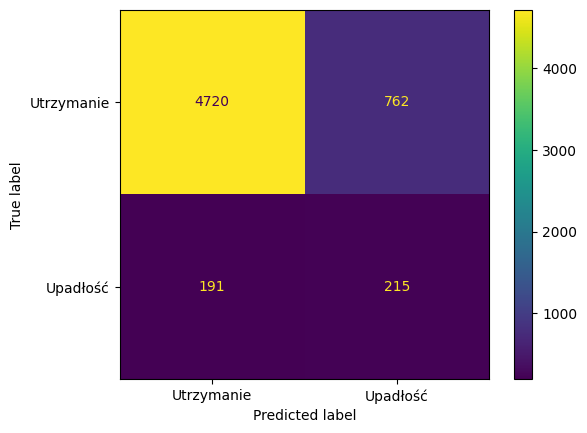

In [59]:
print(classification_report(y, y_pred, target_names=["Utrzymanie", "Bankructwo"]))
confusionMatrix = confusion_matrix(y, y_pred)
confusionMatrixDisplay = ConfusionMatrixDisplay(confusionMatrix, display_labels=["Utrzymanie", "Upadłość"])
confusionMatrixDisplay.plot()

Wszystkie wyniki modelu Zmijewskiego są bardzo zbliżone do tych uzyskanych dla modelu Grover'a. Model Zmijewskiego nieco lepiej radzi sobie z prawidłową klasyfikacją przedsiębiorsw, u których nie zanotowano bankructwa. Jednakże tak samo źle radzi sobie z prawidłową identyfikacją firm bankrutujących.

### *WNIOSKI*

Wszystkie modele analizowane wykazały ograniczoną skuteczność w przewidywaniu bankructwa. Pomimo zastosowania różnych technik i algorytmów, żaden z nich nie osiągnął satysfakcjonujących wyników w przewidywaniu upadłości firm. To wskazuje na trudności związane z prognozowaniem takiej złożonej i wielowymiarowej zmiennej.
Wszystkie modele wykazały względnie lepsze wyniki w przewidywaniu utrzymania firmy. Wskazuje to na fakt, że modele są bardziej skuteczne w identyfikowaniu stabilnych i rentownych firm, które nie mają ryzyka bankructwa.

Najlepsze wyniki w przewidywaniu bankructwa uzyskano dla samodzielnie opracowanego modelu, a najgorsze w przypadku modelu Altmana.

Niepowodzenie modeli w przewidywaniu bankructwa może wynikać z wielu czynników. Zmienna natura i dynamika biznesu, zmienność rynkowa, niewłaściwe dane wejściowe czy też brak uwzględnienia czynników nieliczonych w modelach to tylko niektóre z możliwych przyczyn. Ważne jest, aby uważać na zastosowanie wyników tych modeli w praktyce. Choć modele nie osiągnęły oczekiwanych wyników w przewidywaniu bankructwa, mogą dostarczyć cennych wskazówek i informacji dla decydentów biznesowych. 
Przewidywanie bankructwa jest trudnym zadaniem i wymaga holistycznego podejścia. Nie można polegać wyłącznie na modelach statystycznych. Również ekspertyza branżowa, wiedza o specyfice rynku i zdolność interpretacji kontekstu są kluczowe dla skutecznego zarządzania ryzykiem bankructwa.